**Савин Александр**  
**Вариант 20**  
**Лабороторная работа номер 8**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from collections import deque

import math
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [ ]:
class TDL(nn.Module):
  def __init__(self, in_features, delays=1):
    super(TDL, self).__init__()
    self.in_features = in_features
    self.delays = delays
    self.line = deque()
    self.clear()

  def clear(self):
    self.line.clear()
    for i in range(self.delays):
      self.line.append(torch.zeros(self.in_features))

  def push(self, inputs):
    self.line.appendleft(inputs)

  def forward(self, inputs=0):
    return self.line.pop()

In [ ]:
class NARX(nn.Module):
  def __init__(self, in_features, hi_features, out_features, delay1, delay2):
    super(NARX, self).__init__()
    self.in_features = in_features
    self.hi_features = hi_features
    self.out_features = out_features
    self.line1 = TDL(in_features, delay1)
    self.line2 = TDL(out_features, delay2)
    self.w1 = torch.nn.Parameter(torch.randn(in_features, hi_features))
    self.w2 = torch.nn.Parameter(torch.randn(hi_features, out_features))
    self.w3 = torch.nn.Parameter(torch.randn(out_features, hi_features))
    self.b1 = torch.nn.Parameter(torch.ones(hi_features))
    self.b2 = torch.nn.Parameter(torch.ones(out_features))

  def clear(self):
    self.line1.clear()
    self.line2.clear()

  def forward(self, inputs):
    out1 = torch.tanh(self.line1() @ self.w1 + self.line2() @ self.w3 + self.b1)
    out2 = out1 @ self.w2 + self.b2
    self.line1.push(torch.tensor(inputs))
    self.line2.push(torch.tensor(out2))
    return out2

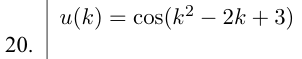

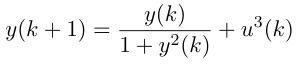

In [ ]:
model = NARX(5, 10, 5, 3, 3)
optimizer = optim.Adam(model.parameters(), lr = 1e-3)
epochs = 100
w = 5

k = np.arange(0, 10, 0.01)
N = len(k)
uk, yk = np.cos(k**2 - 2 * k + 3), [0]

for i in range(N-1):
  yk += [yk[-1] / (1 + yk[-1]**2) + uk[i] ** 3]

In [ ]:
train_data = [(np.array(uk[i:i+w], dtype=np.float32),
               np.array(yk[i:i+w], dtype=np.float32)) for i in range(N-5)]
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=1, shuffle=False)

In [ ]:
model.train()

NARX(
  (line1): TDL()
  (line2): TDL()
)

In [ ]:
train_loss = []

for i in range(epochs):
  pbar = tqdm(enumerate(train_loader))
  model.clear()
  epoch_loss = []

  for _, (inputs, outputs_gt) in pbar:
    outputs = model(inputs)

    crit = nn.MSELoss()
    loss = torch.sqrt(crit(outputs_gt, outputs))
    epoch_loss += [loss.item()]

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  train_loss += [np.mean(epoch_loss)]
  pbar.write(' %d. loss: %f' % (i + 1, train_loss[-1]))

0it [00:00, ?it/s]<ipython-input-3-492d5e9e5777>:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.line1.push(torch.tensor(inputs))
<ipython-input-3-492d5e9e5777>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.line2.push(torch.tensor(out2))
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([1, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
995it [00:00, 1006.33it/s]


 1. loss: 2.215252


995it [00:00, 1049.95it/s]


 2. loss: 0.837006


995it [00:00, 1083.26it/s]


 3. loss: 0.422457


995it [00:00, 1089.62it/s]


 4. loss: 0.291831


995it [00:00, 1047.03it/s]


 5. loss: 0.247677


995it [00:00, 1065.32it/s]


 6. loss: 0.197995


995it [00:01, 761.24it/s]


 7. loss: 0.179750


995it [00:00, 1057.58it/s]


 8. loss: 0.169423


995it [00:00, 1073.63it/s]


 9. loss: 0.161788


995it [00:00, 1079.88it/s]


 10. loss: 0.155099


995it [00:00, 1092.79it/s]


 11. loss: 0.148491


995it [00:00, 1065.76it/s]


 12. loss: 0.141150


995it [00:00, 1025.02it/s]


 13. loss: 0.135230


995it [00:00, 995.14it/s]


 14. loss: 0.129710


995it [00:00, 1109.62it/s]


 15. loss: 0.124664


995it [00:00, 1086.86it/s]


 16. loss: 0.120400


995it [00:00, 1075.73it/s]


 17. loss: 0.116516


995it [00:00, 1021.06it/s]


 18. loss: 0.112884


995it [00:00, 1056.95it/s]


 19. loss: 0.109656


995it [00:00, 1076.18it/s]


 20. loss: 0.106777


995it [00:00, 1044.43it/s]


 21. loss: 0.103996


995it [00:00, 998.46it/s]


 22. loss: 0.102172


995it [00:01, 990.71it/s] 


 23. loss: 0.100995


995it [00:00, 1001.76it/s]


 24. loss: 0.100386


995it [00:00, 1020.63it/s]


 25. loss: 0.099726


995it [00:00, 1020.79it/s]


 26. loss: 0.099258


995it [00:01, 990.50it/s] 


 27. loss: 0.098815


995it [00:00, 1004.73it/s]


 28. loss: 0.098815


995it [00:00, 1065.58it/s]


 29. loss: 0.098922


995it [00:00, 1015.71it/s]


 30. loss: 0.098928


995it [00:00, 1002.54it/s]


 31. loss: 0.098660


995it [00:00, 1004.31it/s]


 32. loss: 0.099312


995it [00:00, 1054.51it/s]


 33. loss: 0.099268


995it [00:00, 1037.08it/s]


 34. loss: 0.098483


995it [00:01, 941.72it/s]


 35. loss: 0.097279


995it [00:01, 991.36it/s] 


 36. loss: 0.097456


995it [00:01, 992.65it/s]


 37. loss: 0.097780


995it [00:01, 994.29it/s]


 38. loss: 0.095787


995it [00:00, 1058.69it/s]


 39. loss: 0.096916


995it [00:00, 1076.21it/s]


 40. loss: 0.096442


995it [00:00, 1099.70it/s]


 41. loss: 0.095641


995it [00:00, 1052.25it/s]


 42. loss: 0.095516


995it [00:00, 1093.12it/s]


 43. loss: 0.095908


995it [00:00, 1090.01it/s]


 44. loss: 0.095629


995it [00:00, 1047.43it/s]


 45. loss: 0.094559


995it [00:00, 1096.64it/s]


 46. loss: 0.094293


995it [00:00, 1061.76it/s]


 47. loss: 0.094354


995it [00:00, 1015.44it/s]


 48. loss: 0.093735


995it [00:00, 1081.62it/s]


 49. loss: 0.093223


995it [00:00, 1093.24it/s]


 50. loss: 0.092508


995it [00:00, 1063.62it/s]


 51. loss: 0.091879


995it [00:00, 1044.88it/s]


 52. loss: 0.091181


995it [00:00, 1016.65it/s]


 53. loss: 0.090425


995it [00:00, 1082.80it/s]


 54. loss: 0.089576


995it [00:00, 1082.79it/s]


 55. loss: 0.088861


995it [00:00, 1100.61it/s]


 56. loss: 0.088443


995it [00:00, 1031.18it/s]


 57. loss: 0.087823


995it [00:00, 1020.40it/s]


 58. loss: 0.087244


995it [00:00, 1011.75it/s]


 59. loss: 0.086793


995it [00:00, 1045.24it/s]


 60. loss: 0.086256


995it [00:00, 1021.28it/s]


 61. loss: 0.085858


995it [00:00, 1015.30it/s]


 62. loss: 0.085316


995it [00:00, 1000.24it/s]


 63. loss: 0.084899


995it [00:01, 989.44it/s] 


 64. loss: 0.084501


995it [00:00, 1023.98it/s]


 65. loss: 0.084129


995it [00:00, 1012.78it/s]


 66. loss: 0.083707


995it [00:01, 982.62it/s]


 67. loss: 0.083442


995it [00:00, 1023.66it/s]


 68. loss: 0.083045


995it [00:01, 915.23it/s]


 69. loss: 0.082692


995it [00:01, 664.30it/s]


 70. loss: 0.082245


995it [00:01, 869.11it/s] 


 71. loss: 0.081524


995it [00:01, 984.21it/s]


 72. loss: 0.080762


995it [00:00, 1042.50it/s]


 73. loss: 0.080523


995it [00:00, 1116.03it/s]


 74. loss: 0.079810


995it [00:00, 1104.77it/s]


 75. loss: 0.079249


995it [00:00, 1091.89it/s]


 76. loss: 0.078891


995it [00:00, 1064.88it/s]


 77. loss: 0.078494


995it [00:00, 1056.39it/s]


 78. loss: 0.078026


995it [00:00, 1042.58it/s]


 79. loss: 0.077592


995it [00:00, 1030.01it/s]


 80. loss: 0.077199


995it [00:00, 1005.57it/s]


 81. loss: 0.077488


995it [00:00, 1010.79it/s]


 82. loss: 0.077055


995it [00:01, 968.98it/s]


 83. loss: 0.077616


995it [00:00, 995.11it/s]


 84. loss: 0.075888


995it [00:01, 987.89it/s]


 85. loss: 0.076823


995it [00:00, 1034.95it/s]


 86. loss: 0.075987


995it [00:00, 1041.28it/s]


 87. loss: 0.075716


995it [00:00, 1049.75it/s]


 88. loss: 0.076744


995it [00:00, 1055.59it/s]


 89. loss: 0.076943


995it [00:01, 974.21it/s]


 90. loss: 0.075585


995it [00:01, 989.62it/s]


 91. loss: 0.075958


995it [00:00, 1027.06it/s]


 92. loss: 0.075700


995it [00:00, 1002.89it/s]


 93. loss: 0.075356


995it [00:00, 1031.31it/s]


 94. loss: 0.075677


995it [00:00, 1001.72it/s]


 95. loss: 0.074869


995it [00:00, 997.05it/s] 


 96. loss: 0.074145


995it [00:00, 1031.15it/s]


 97. loss: 0.073825


995it [00:00, 1087.48it/s]


 98. loss: 0.073423


995it [00:00, 1074.93it/s]


 99. loss: 0.073349


995it [00:00, 1022.73it/s]

 100. loss: 0.072715


In [ ]:
model.eval()
model.clear()

predict = []
for x, _ in train_data:
  predict += [model(x).detach().numpy().item(-1)]


<ipython-input-3-492d5e9e5777>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.line2.push(torch.tensor(out2))


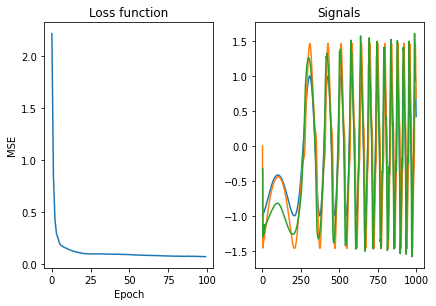

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.tight_layout()

axes[0].set_title('Loss function')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE')
axes[0].plot(train_loss)

axes[1].set_title('Signals')
axes[1].plot(uk)
axes[1].plot(yk)
axes[1].plot(predict, '-')

plt.show()

# blue - управляющий сигнал
# orange - идеальный выход
# green - результат обучения

200 эпох  
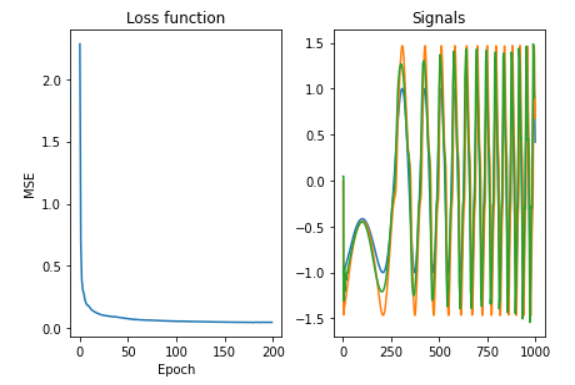

500 эпох  
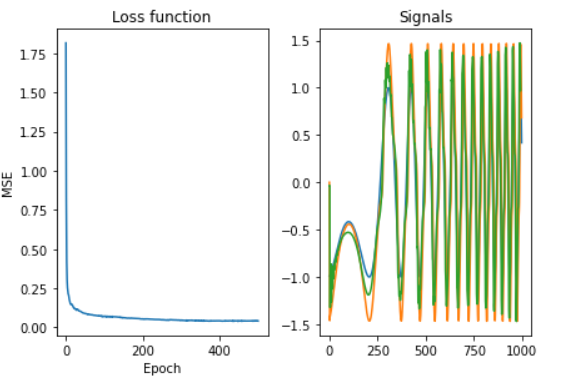